    Paridhi Bhardwaj CS370-101 
    ASSIGNMENT - 1 

In [18]:
#importing lib
import torch
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Simulation of Multivariate Normal Distribution

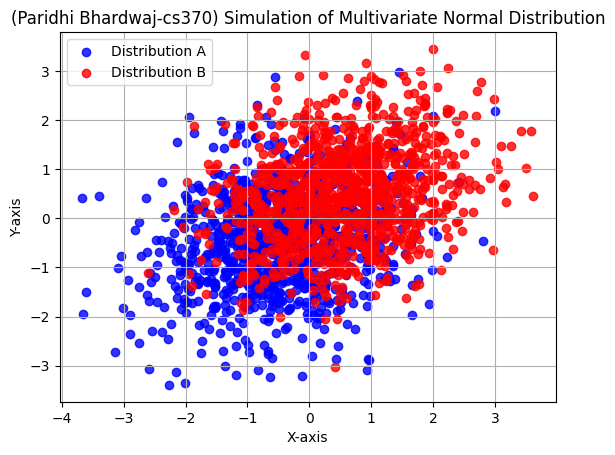

In [19]:
#generate sample
m = 1000
#values initializing given in the question
A_Mean=torch.tensor([-0.5, -0.5]) #tensor-> arrays
B_Mean=torch.tensor([0.5,0.5])

A_cov=torch.tensor([[1,0.25],[0.25,1]])
B_cov=torch.tensor([[1,0.25],[0.25,1]])

#define the two bivariate normal distribution
MNB_A=torch.distributions.MultivariateNormal(A_Mean, covariance_matrix=A_cov)
MNB_B=torch.distributions.MultivariateNormal(B_Mean, covariance_matrix=B_cov)

#samples generating
A_Sample = MNB_A.sample((m,))
B_Sample = MNB_B.sample((m,))

#scatter A
x=A_Sample[:,0]
y=A_Sample[:,1]
plt.scatter(x,y,color='blue',label='Distribution A',alpha=0.8)

#scatter B
x1=B_Sample[:,0]
y1=B_Sample[:,1]
plt.scatter(x1,y1,color='red',label='Distribution B',alpha=0.8)

plt.title('(Paridhi Bhardwaj-cs370) Simulation of Multivariate Normal Distribution')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

plt.legend()
plt.grid(True)
plt.show()

#stack them into a single tensor X
X = torch.cat([A_Sample, B_Sample], dim=0)



K-Means Clustering

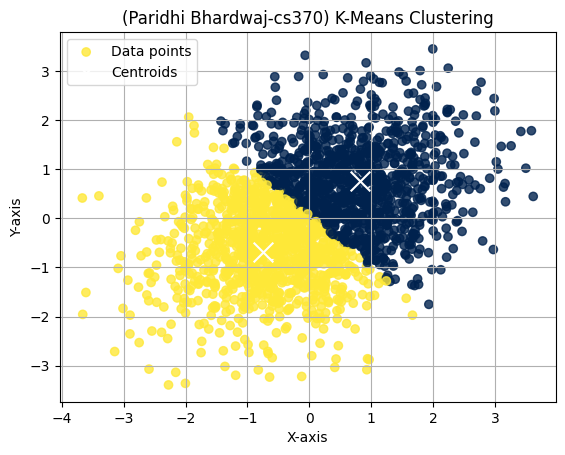

In [20]:
#question-2
#initialize centroids
def init_centroids(X,k):
    index=torch.randperm(X.shape[0])[:k]
    return X[index]

#assign
def assign(X,centroids):
    d=torch.cdist(X,centroids)
    return torch.argmin(d,dim=1)

#update val
def update(X,labels,k):
    centroids = torch.zeros((k, X.shape[1]))
    for i in range(k):
        point = X[labels == i]
        if len(point)>0:
            centroids[i] = point.mean(dim=0)
    return centroids

# KMeans
def kmeans(X,k,n=50):
    centroids = init_centroids(X,k)
    for i in range(n):
        labels=assign(X,centroids)
        new_centroids = update(X,labels,k)
        if torch.equal(centroids, new_centroids):
            break
        centroids = new_centroids
    return labels,centroids

k=2
labels, centroids = kmeans(X,k)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='cividis', alpha=0.8, label='Data points')
plt.scatter(centroids[:, 0], centroids[:, 1], color='white', marker='x', s=200, label='Centroids')
plt.title('(Paridhi Bhardwaj-cs370) K-Means Clustering')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()



Projection with Principal Components Analysis (PCA)

In [21]:
#problem 3
X=torch.randn(100,4)

X[:,2]=3*X[:,0] - 2*X[:,1]+torch.randn(100)*0.1
X[:,3]=1.5*X[:,0] - 0.5*X[:,1]+torch.randn(100)*0.1

MeanX=torch.mean(X,dim=0)
CentX=X-MeanX

CovMatrix=torch.mm(CentX.T, CentX) / CentX.shape[0]

eigenvalues, eigenvectors = torch. linalg.eig(CovMatrix)
eigenvectors = eigenvectors.real
eigenvalues = eigenvalues.real

sort = torch.argsort(eigenvalues, descending=True)
eigenvectors = eigenvectors [:,sort]
print(eigenvectors[:, :4])

X_np = CentX.detach().numpy()
sklearnPCA=PCA(n_components=4)
sklearnPCA.fit(X_np)
princ = sklearnPCA.components_. T
print ("Projection with Principal Components Analysis (PCA):")
print (princ)

tensor([[ 0.1862, -0.4922,  0.1682, -0.8336],
        [-0.1692, -0.7888,  0.3250,  0.4935],
        [ 0.8967,  0.0976,  0.3728,  0.2178],
        [ 0.3642, -0.3550, -0.8527,  0.1189]])
Projection with Principal Components Analysis (PCA):
[[ 0.18615043  0.49219704 -0.16818601  0.8335488 ]
 [-0.16916883  0.7887921  -0.32494974 -0.49355513]
 [ 0.896703   -0.09756134 -0.372752   -0.21785639]
 [ 0.36421642  0.35500836  0.8527468  -0.1189049 ]]
